# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hradyz'k
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | tara
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | sur
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | sao jose da coroa grande
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | cuenca
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | amga
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | bredasdor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hradyz'k,49.2346,33.1361,32.74,35,0,8.19,UA,1691312064
1,waitangi,-43.9535,-176.5597,7.68,60,100,6.83,NZ,1691312064
2,puerto natales,-51.7236,-72.4875,-0.89,75,97,7.14,CL,1691312064
3,olonkinbyen,70.9221,-8.7187,3.35,97,100,9.82,SJ,1691312065
4,tara,56.8944,74.3710,25.54,35,0,4.10,RU,1691312065


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hradyz'k,49.2346,33.1361,32.74,35,0,8.19,UA,1691312064
1,waitangi,-43.9535,-176.5597,7.68,60,100,6.83,NZ,1691312064
2,puerto natales,-51.7236,-72.4875,-0.89,75,97,7.14,CL,1691312064
3,olonkinbyen,70.9221,-8.7187,3.35,97,100,9.82,SJ,1691312065
4,tara,56.8944,74.3710,25.54,35,0,4.10,RU,1691312065


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

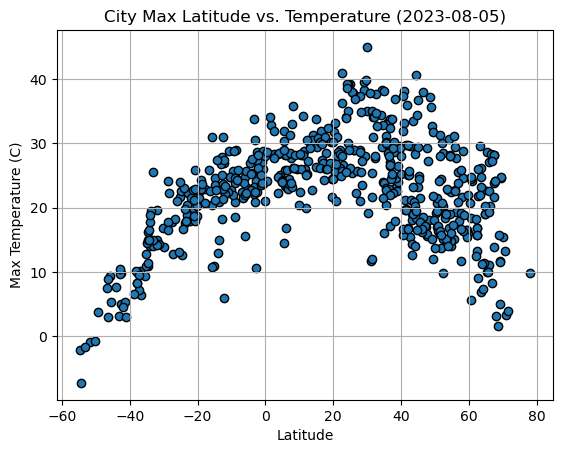

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker= "o", edgecolors = "black")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-08-05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

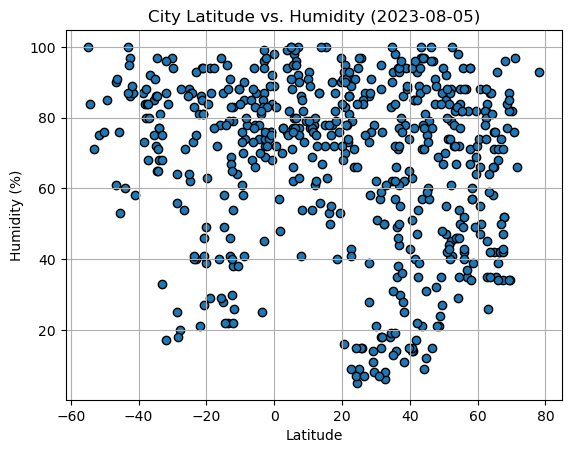

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-08-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

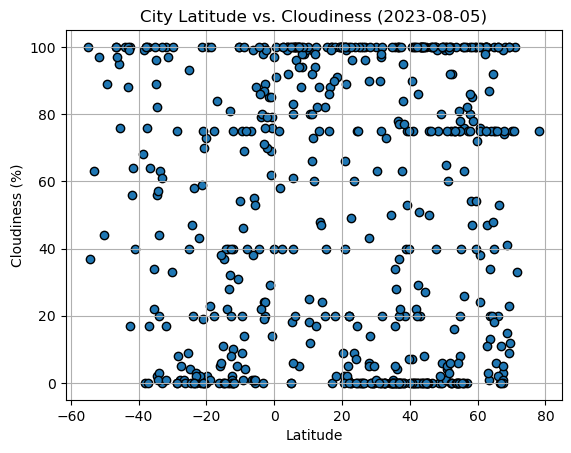

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-08-05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

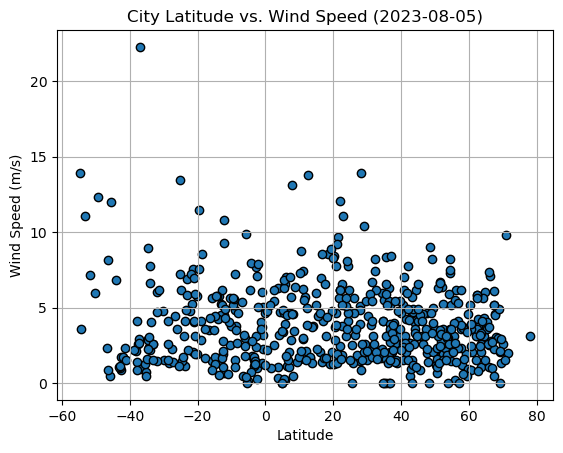

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-08-05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linear_regression (x, y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    linear_line = x * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    return linear_line, slope, intercept, rvalue, line
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hradyz'k,49.2346,33.1361,32.74,35,0,8.19,UA,1691312064
3,olonkinbyen,70.9221,-8.7187,3.35,97,100,9.82,SJ,1691312065
4,tara,56.8944,74.3710,25.54,35,0,4.10,RU,1691312065
7,anadyr,64.7500,177.4833,11.28,76,40,6.00,RU,1691312065
10,sur,22.5667,59.5289,36.23,43,49,1.88,OM,1691312066


In [14]:
#Create a Dataframe with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,7.68,60,100,6.83,NZ,1691312064
2,puerto natales,-51.7236,-72.4875,-0.89,75,97,7.14,CL,1691312064
5,grytviken,-54.2811,-36.5092,-7.24,84,37,3.59,GS,1691312065
6,port-aux-francais,-49.3500,70.2167,3.74,85,89,12.36,TF,1691312065
8,adamstown,-25.0660,-130.1015,21.71,88,93,13.45,PN,1691312065


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.49185378973689375


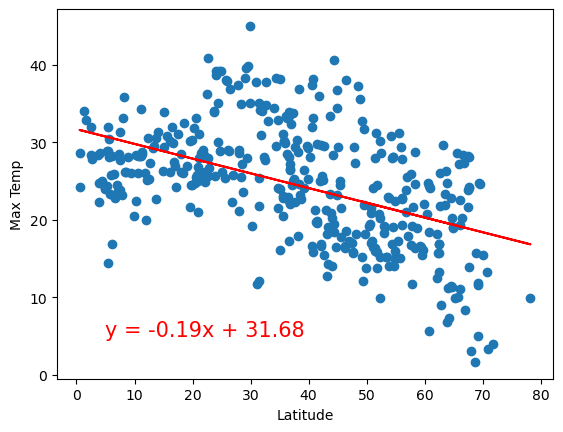

In [22]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_line, slope, intercept, rvalue, line = linear_regression (x,y)
plt.scatter(x, y, marker = "o")
plt.plot(x, linear_line, color = "red")
plt.annotate(line, (5, 5), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")



The r-value is: 0.8300210454110682


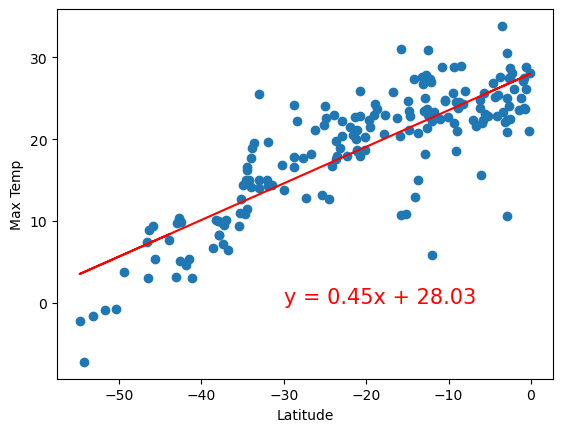

In [24]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_line, slope, intercept, rvalue, line = linear_regression (x,y)
plt.scatter(x, y, marker = "o")
plt.plot(x, linear_line, color = "red")
plt.annotate(line, (-30, 0), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

Plot 1: Northern Hemisphere (Latitude vs. Max Temp)

Plot 2: Southern Hemisphere (Latitude vs. Max Temp)

In the northern hemisphere, as latitude increases, the temperature decreases. Conversely, in the southern hemisphere, as the latitude increases, the max temperature increases. By comparing these two plots, the temperature seems to hit its vertex at or around 0 (equator). Although the slope in the southern hemisphere is steeper than the northern hemisphere, both slopes are quite steep. These two plots proves that as we move away from the South Pole and towards the equator, the temperature rises, and as the latitude coordinates increase past the equator towards the north pole, the temperature decreases.


With an rvalue of -.49, the northen hemisphere's strength of correlation is just under moderate. The southern hemisphere, however, has an rvalue of .83, which indicates a strong correlation between the two factors.  This sample set is a reliable piece of data that can be used to determine the temperature across latitude coordinates.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.15242919182491893


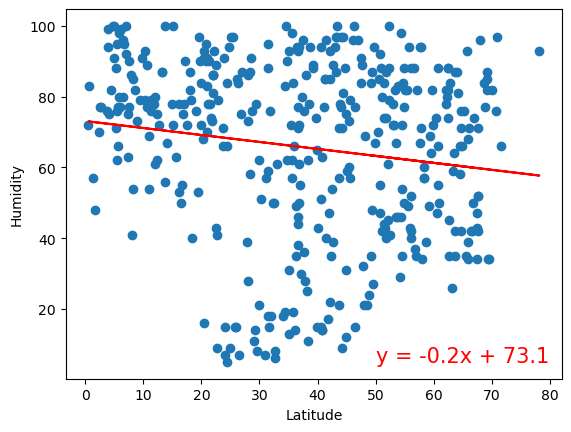

In [26]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_line, slope, intercept, rvalue, line = linear_regression (x,y)
plt.scatter(x, y, marker = "o")
plt.plot(x, linear_line, color = "red")
plt.annotate(line, (50, 5), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

The r-value is: -0.07450584070014411


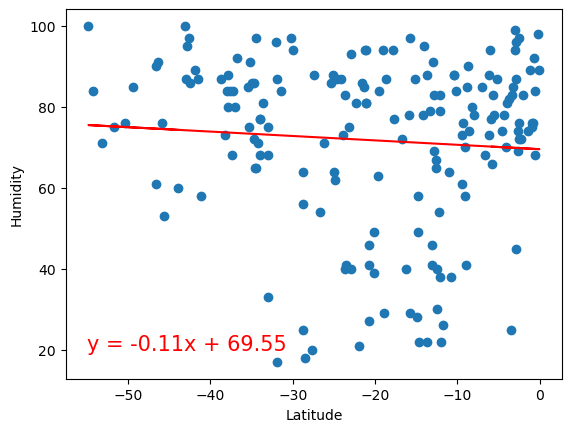

In [28]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_line, slope, intercept, rvalue, line = linear_regression (x,y)
plt.scatter(x, y, marker = "o")
plt.plot(x, linear_line, color = "red")
plt.annotate(line, (-55, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** 

Plot 1: Northern Hemisphere (Latitude vs. Humidity)

Plot 2. Southern Hemisphere (Latitude vs. Humidity)

Unlike the Latitude vs. Max Temp plots, the slopes for the two plots above are relatively flat. With the northern hemisphere having an rvalue of -1.5  and the southern hemisphere having an rvalue of -.07, both are relatively weak correlations. This shows that humidity does not have a significance regarding latitude coordinates for both hemispheres. A possible limitation of this data could be the time of the year.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.12186376146445063


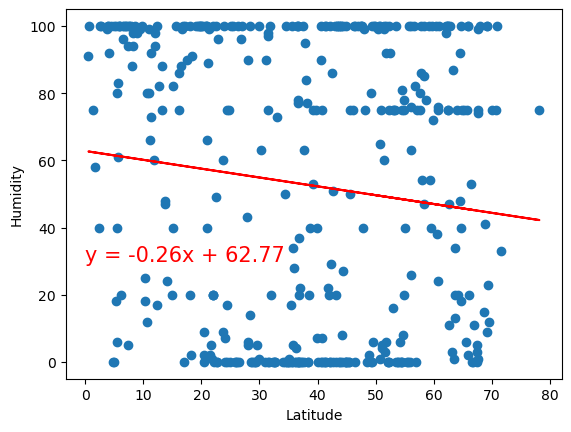

In [31]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_line, slope, intercept, rvalue, line = linear_regression (x,y)
plt.scatter(x, y, marker = "o")
plt.plot(x, linear_line, color = "red")
plt.annotate(line, (0, 30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

The r-value is: -0.14741045387114415


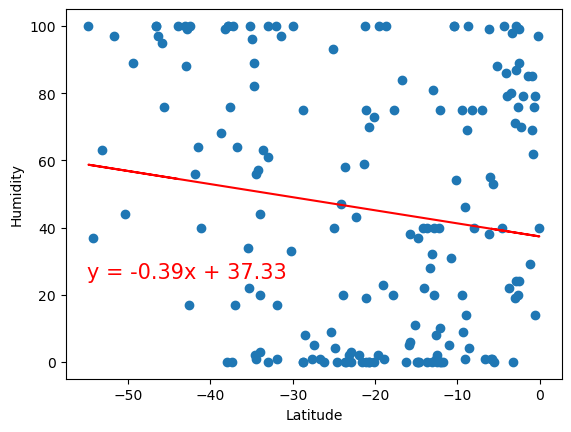

In [33]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_line, slope, intercept, rvalue, line = linear_regression (x,y)
plt.scatter(x, y, marker = "o")
plt.plot(x, linear_line, color = "red")
plt.annotate(line, (-55, 25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:

Plot 1: Northern Hemisphere (Latitude vs. Cloudiness)

Plot 2. Southern Hemisphere (Latitude vs. Cloudiness)

Unlike the Latitude vs. Max Temp plots, the slopes for the two plots above are relatively flat. With the northern hemisphere having an rvalue of -1.2  and the southern hemisphere having an rvalue of -.14, both are relatively weak correlations. This shows that cloudiness does not have a significance regarding latitude coordinates for both hemispheres. A potential limitation for this data could be the time of the year.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14500441805410316


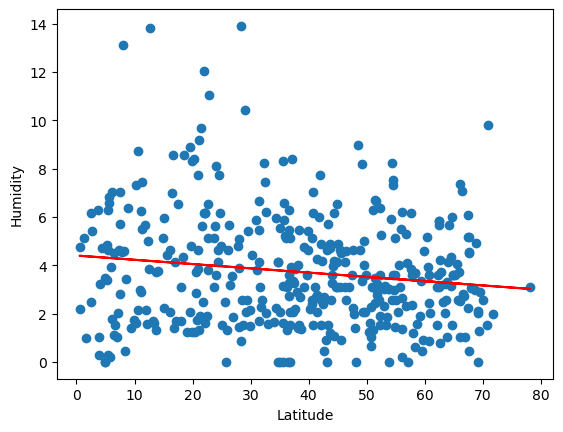

In [34]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_line, slope, intercept, rvalue, line = linear_regression (x,y)
plt.scatter(x, y, marker = "o")
plt.plot(x, linear_line, color = "red")
plt.annotate(line, (0, 30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

The r-value is: -0.13326811700258273


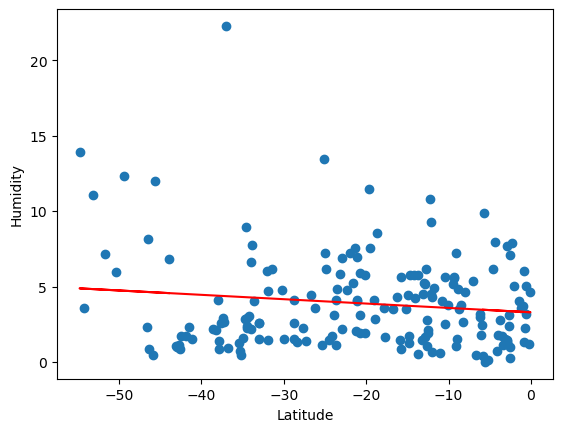

In [35]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_line, slope, intercept, rvalue, line = linear_regression (x,y)
plt.scatter(x, y, marker = "o")
plt.plot(x, linear_line, color = "red")
plt.annotate(line, (-55, 25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:

Plot 1: Northern Hemisphere (Latitude vs. Wind Speed)

Plot 2. Southern Hemisphere (Latitude vs. Wind Speed)

Unlike the Latitude vs. Max Temp plots, the slopes for the two plots above are relatively flat. With the northern hemisphere having an rvalue of -.14  and the southern hemisphere having an rvalue of -.13, both are relatively weak correlations. This shows that cloudiness does not have a significance regarding latitude coordinates for both hemispheres. A potential limitation for this data could be the time of the year.